# Data Analysis

This notebook mainly focuses on getting insights into our dataset. Throughout the analysis as well as later on during the model building phase (covered in Modelling notebook), we will be using *df_cleaned.csv* which only contains the receipt id's for which there was a possible match amongst all of its corrusponding feature_transaction_id's. For more details on how and why this dataset was created, please refer to the "Data Cleaning Notebook" in this repository.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the dataset which we cleaned in the previous notebook
df_cleaned = pd.read_csv("df_cleaned.csv")
df_cleaned.head()

,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch,is_match
0,"10,001",10000,"10,605","10,596",0.0,0.4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,"10,001",10000,"10,605","10,597",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,"10,001",10000,"10,605","10,598",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,"10,001",10000,"10,605","10,599",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,"10,001",10000,"10,605","10,600",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [3]:
possible_matches_for_each_receipt = df_cleaned.groupby(by="receipt_id")['feature_transaction_id'].count().reset_index()
possible_matches_for_each_receipt.head(10)

,receipt_id,feature_transaction_id
0,"10,001",7
1,"10,002",7
2,"10,003",8
3,"10,005",15
4,"10,007",10
5,"10,009",17
6,"10,010",10
7,"10,011",17
8,"10,012",10
9,"10,014",7


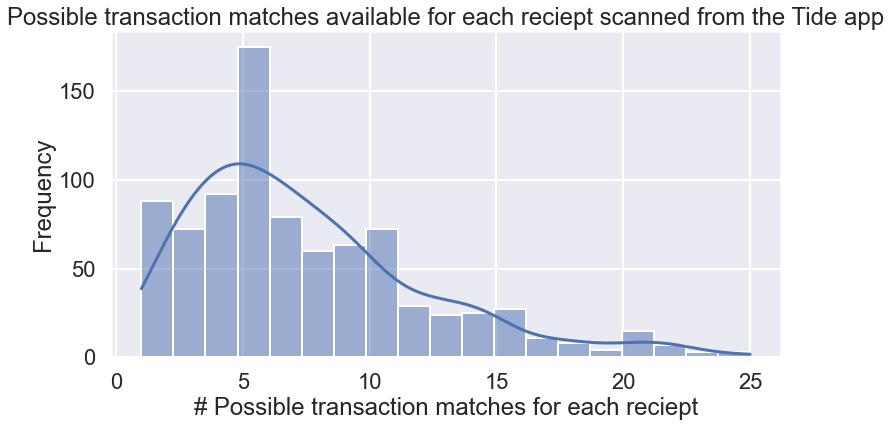

In [5]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.set_theme("poster")
sns.histplot(possible_matches_for_each_receipt.feature_transaction_id,kde =True)
plt.xlabel("# Possible transaction matches for each reciept")
plt.ylabel("Frequency")
plt.title("Possible transaction matches available for each reciept scanned from the Tide app")
plt.savefig("Fig1",dpi=300)

In [6]:
# Creating a new dataframe that only contains the predictors and the response variable
df_modelling = df_cleaned[['DateMappingMatch', 'AmountMappingMatch',
       'DescriptionMatch', 'DifferentPredictedTime', 'TimeMappingMatch',
       'PredictedNameMatch', 'ShortNameMatch', 'DifferentPredictedDate',
       'PredictedAmountMatch', 'PredictedTimeCloseMatch', 'is_match']]
df_modelling.head()

,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch,is_match
0,0.0,0.4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


We generate a correlation plot to see which predictors have a good association with our target variable

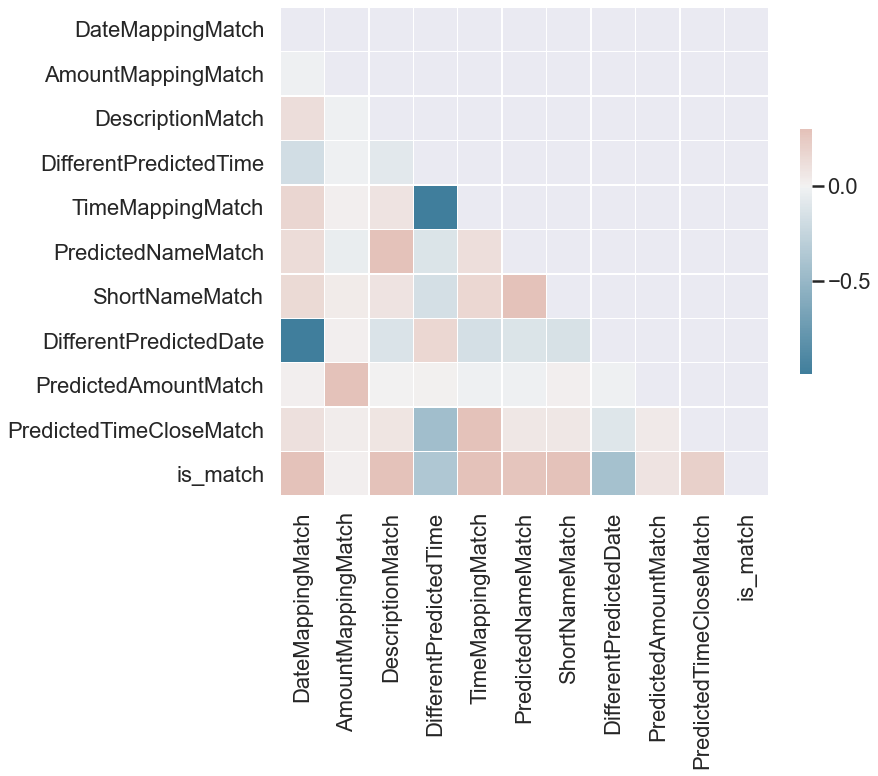

In [11]:
sns.set_theme("poster")
corr = df_modelling.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig("Correlation_HeatMap.png",dpi=300)

As per the results, almost all predictors except for *AmountMappingMatch* & *PredictedAmountMatch* seem to have a good enough association with the response variable.

Let's see how other matching indicators are distributed

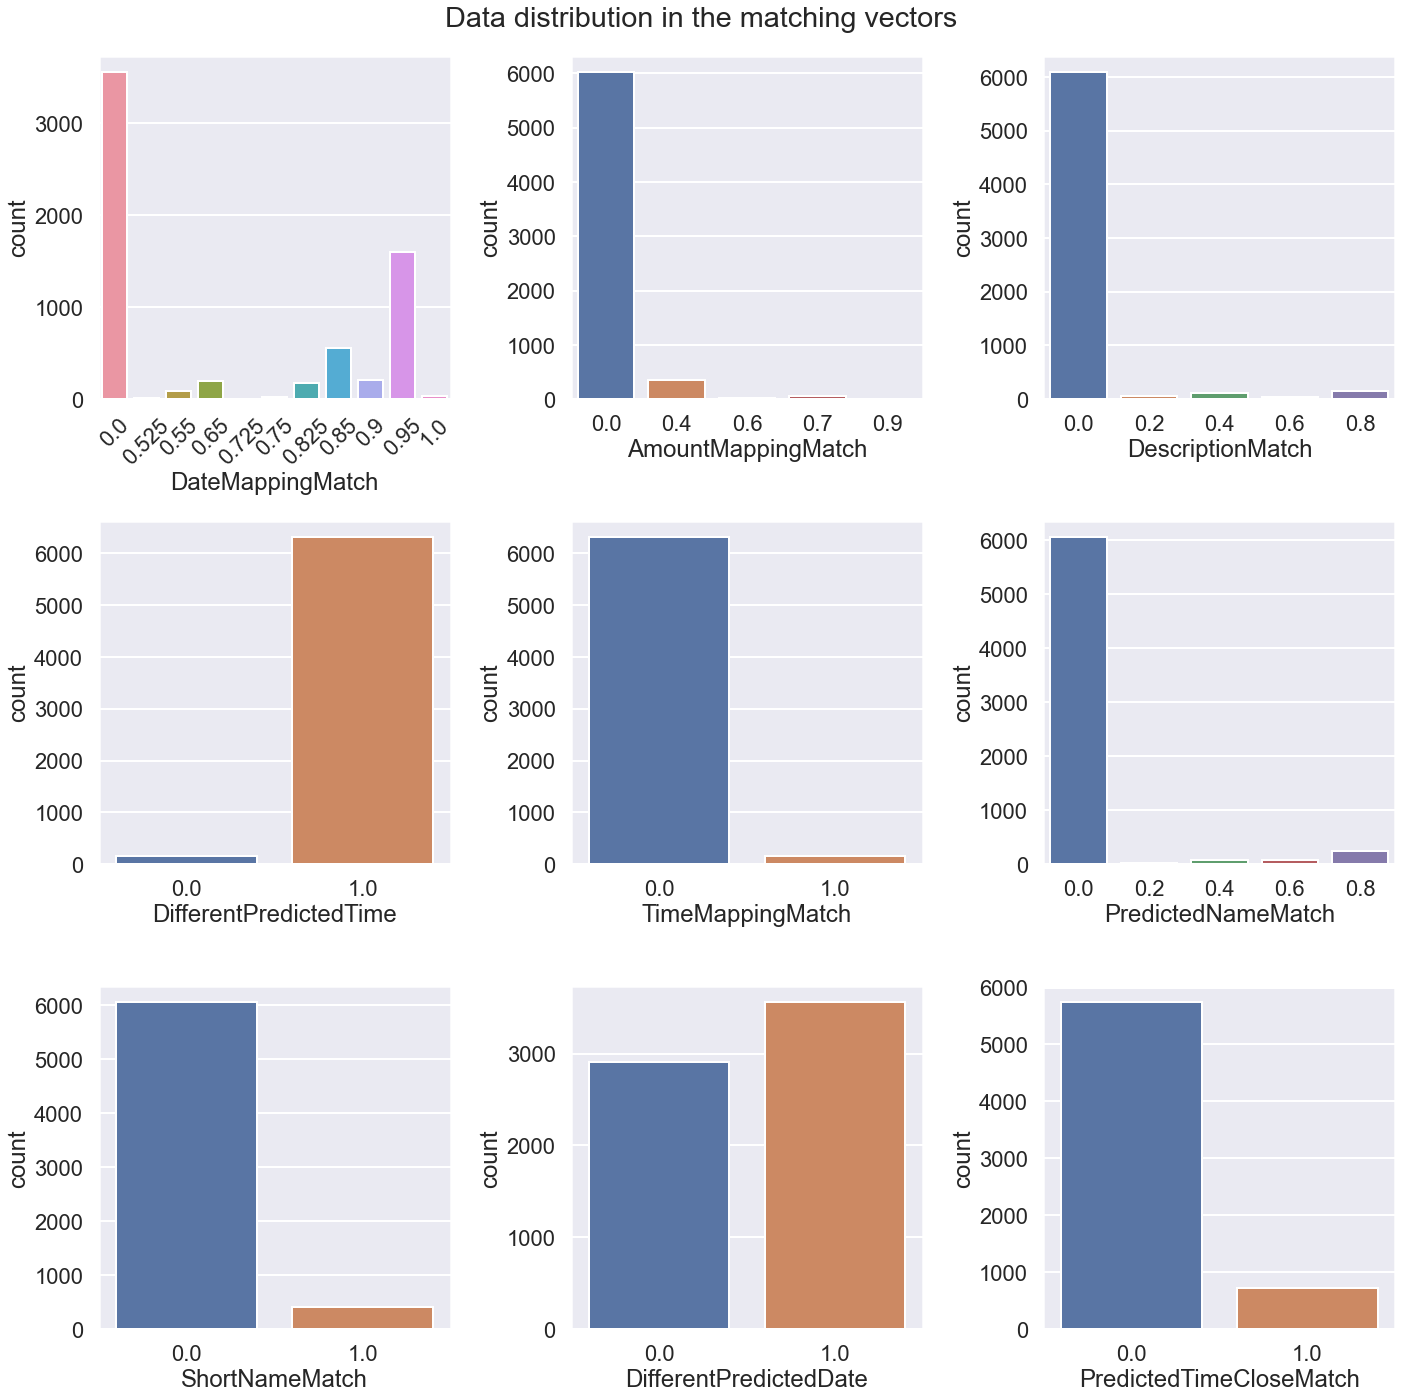

In [12]:
import warnings
warnings.filterwarnings('ignore')
sns.set_theme("poster")
fig, axs = plt.subplots(3, 3,figsize=(20,20))
#plt.figure(figsize=(20,10))
sns.countplot(df_cleaned['DateMappingMatch'],ax=axs[0, 0])
plt.sca(axs[0, 0])
plt.xticks(rotation=45)
sns.countplot(df_cleaned['AmountMappingMatch'],ax=axs[0, 1])
sns.countplot(df_cleaned['DescriptionMatch'],ax=axs[0, 2])
sns.countplot(df_cleaned['DifferentPredictedTime'],ax=axs[1, 0])
sns.countplot(df_cleaned['TimeMappingMatch'],ax=axs[1, 1])
sns.countplot(df_cleaned['PredictedNameMatch'],ax=axs[1, 2])
sns.countplot(df_cleaned['ShortNameMatch'],ax=axs[2, 0])
sns.countplot(df_cleaned['DifferentPredictedDate'],ax=axs[2, 1])
sns.countplot(df_cleaned['PredictedTimeCloseMatch'],ax=axs[2, 2])
fig.suptitle('Data distribution in the matching vectors')
fig.tight_layout()
plt.savefig("Feature_distribution_full_data.png",dpi=300)

Most of the variables in the matching vector (except *Different_predicted_date*) predominantly have 0s

Lets see how this data distribution changes when we only limit the data to the matched samples

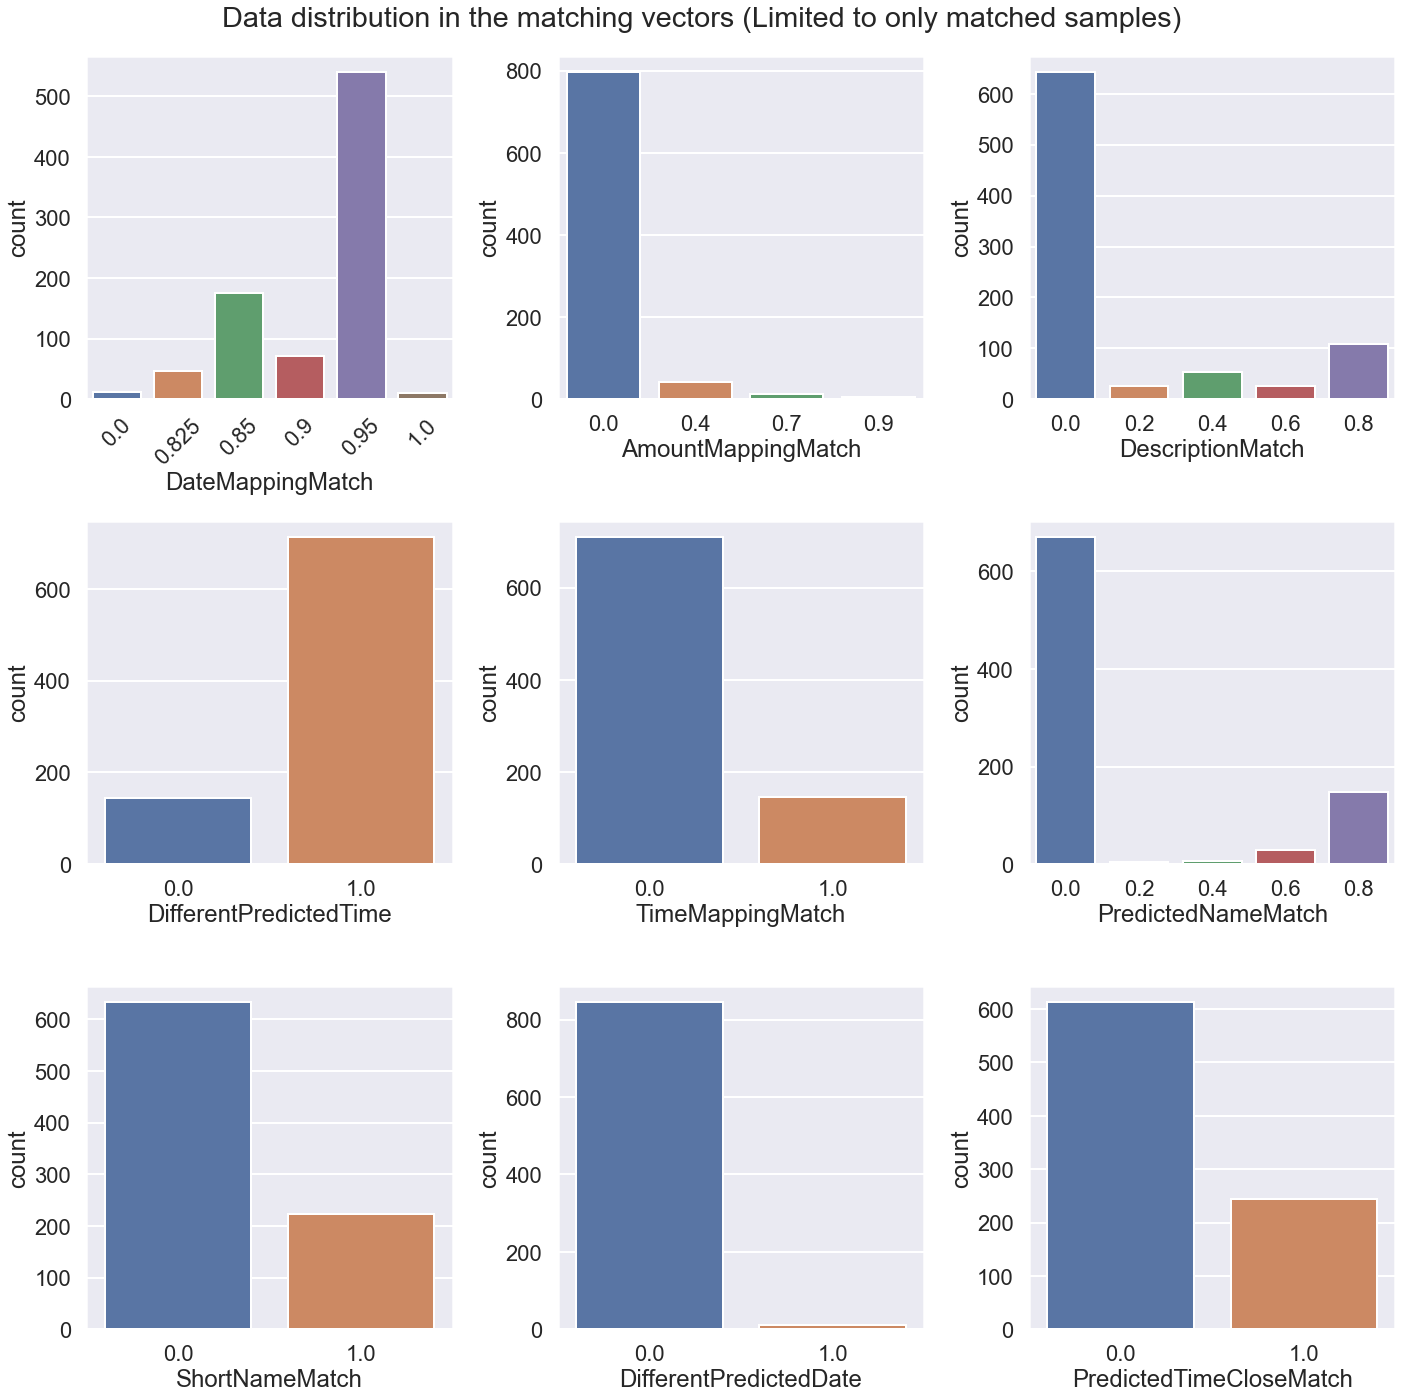

In [13]:
import warnings
warnings.filterwarnings('ignore')
df_only_matches = df_cleaned[df_cleaned["is_match"]==1]
sns.set_theme("poster")
fig, axs = plt.subplots(3, 3,figsize=(20,20))
#plt.figure(figsize=(20,10))
sns.countplot(df_only_matches['DateMappingMatch'],ax=axs[0, 0])
plt.sca(axs[0, 0])
plt.xticks(rotation=45)
sns.countplot(df_only_matches['AmountMappingMatch'],ax=axs[0, 1])
sns.countplot(df_only_matches['DescriptionMatch'],ax=axs[0, 2])
sns.countplot(df_only_matches['DifferentPredictedTime'],ax=axs[1, 0])
sns.countplot(df_only_matches['TimeMappingMatch'],ax=axs[1, 1])
sns.countplot(df_only_matches['PredictedNameMatch'],ax=axs[1, 2])
sns.countplot(df_only_matches['ShortNameMatch'],ax=axs[2, 0])
sns.countplot(df_only_matches['DifferentPredictedDate'],ax=axs[2, 1])
sns.countplot(df_only_matches['PredictedTimeCloseMatch'],ax=axs[2, 2])
fig.suptitle('Data distribution in the matching vectors (Limited to only matched samples)')
fig.tight_layout()
plt.savefig("Feature_distribution_only_matches.png",dpi=300)

The plot below summarizes the difference b/w zero v/s non-zero values in the matching vector

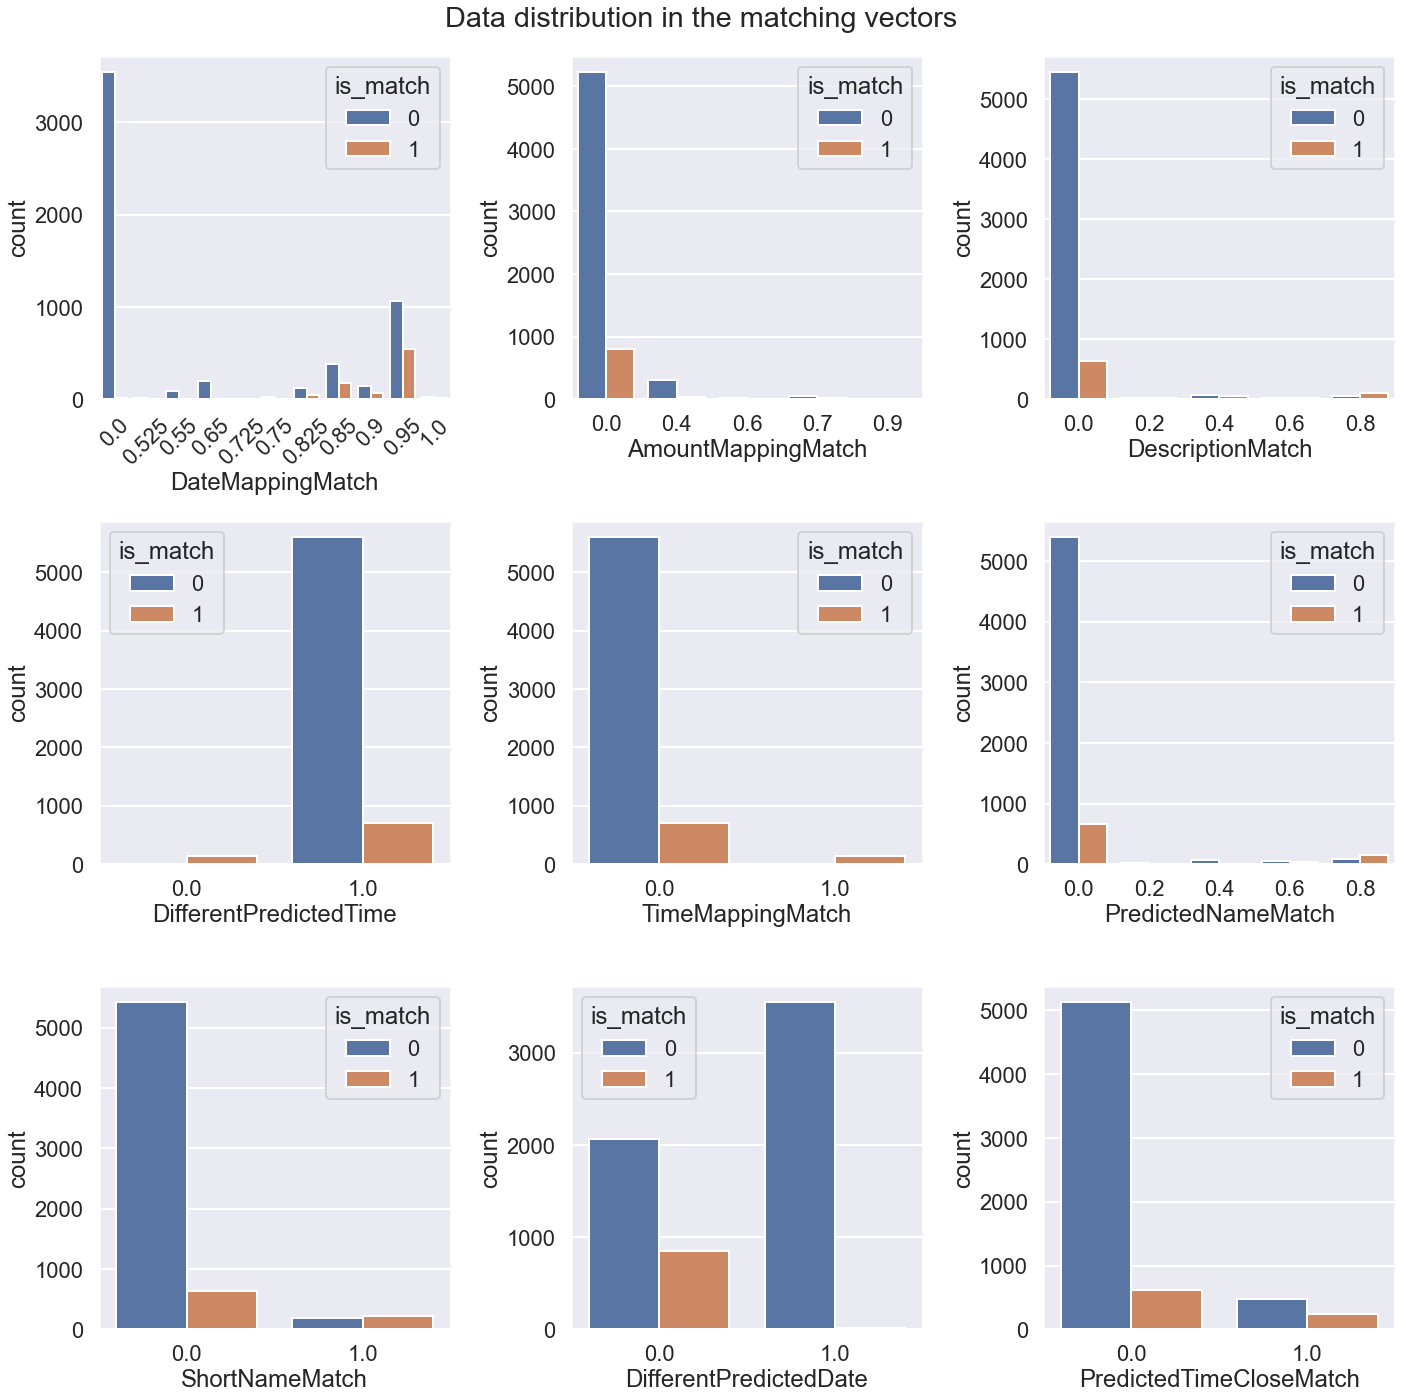

In [14]:
import warnings
warnings.filterwarnings('ignore')
sns.set_theme("poster")
fig, axs = plt.subplots(3, 3,figsize=(20,20))
#plt.figure(figsize=(20,10))
sns.countplot(df_cleaned['DateMappingMatch'],ax=axs[0, 0],data=df_cleaned,hue="is_match")
plt.sca(axs[0, 0])
plt.xticks(rotation=45)
sns.countplot(df_cleaned['AmountMappingMatch'],ax=axs[0, 1],data=df_cleaned,hue="is_match")
sns.countplot(df_cleaned['DescriptionMatch'],ax=axs[0, 2],data=df_cleaned,hue="is_match")
sns.countplot(df_cleaned['DifferentPredictedTime'],ax=axs[1, 0],data=df_cleaned,hue="is_match")
sns.countplot(df_cleaned['TimeMappingMatch'],ax=axs[1, 1],data=df_cleaned,hue="is_match")
sns.countplot(df_cleaned['PredictedNameMatch'],ax=axs[1, 2],data=df_cleaned,hue="is_match")
sns.countplot(df_cleaned['ShortNameMatch'],ax=axs[2, 0],data=df_cleaned,hue="is_match")
sns.countplot(df_cleaned['DifferentPredictedDate'],ax=axs[2, 1],data=df_cleaned,hue="is_match")
sns.countplot(df_cleaned['PredictedTimeCloseMatch'],ax=axs[2, 2],data=df_cleaned,hue="is_match")
fig.suptitle('Data distribution in the matching vectors')
fig.tight_layout()
plt.savefig("Feature_distribution_side_by_side.png",dpi=300)